# Лабораторная работа 1

## Построение морфологического скелета

Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных структурирующих элементов.

Содержание отчета:
- Исходные изображения
- Код программы (для Jupyter Notebook)
- Результат работы программы
- Срок: 15.03.2025


In [17]:
%pylab inline
import skimage.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
from math import ceil

from scipy.ndimage import binary_erosion, binary_dilation

Populating the interactive namespace from numpy and matplotlib


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def print_images(imgs, *, n_cols=None, fig_dim=None):
    if isinstance(imgs, np.ndarray):
        imgs = [imgs]
    num_imgs = len(imgs)
    if num_imgs == 1:
        n_rows, n_cols = 1, 1
        fig_dim = fig_dim or 5
    else:
        n_cols = n_cols or min(num_imgs, 3)
        n_rows = ceil(num_imgs / n_cols)
        fig_dim = fig_dim or 15
    figsize = (fig_dim, fig_dim / n_cols * n_rows)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = np.atleast_1d(axes).flatten()
    for ax, img in zip(axes, imgs):
        ax.imshow(img, cmap='gray' if img.ndim == 2 else None, interpolation='none')
        ax.axis('off')
    for ax in axes[num_imgs:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [72]:
img = (imread('binary.png'))
img.shape

(688, 1000, 4)

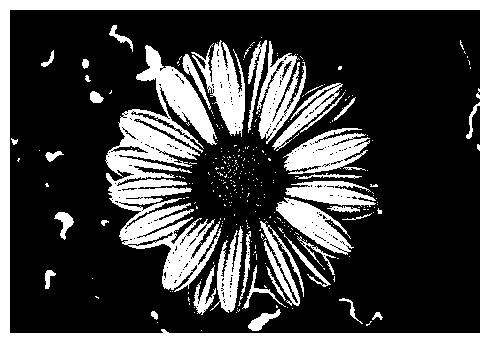

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img_rgb = img[:, :, :3]
img_gray = rgb2gray(img_rgb)
threshold = 0.5
img_binary = img_gray > threshold
print_images(img_binary)


In [74]:
# creating structuring element
r = 3 # radius
x, y = np.meshgrid(np.arange(-r, r + 1), np.arange(-r, r + 1))
struct_el = (np.hypot(x, y) <= r).astype(bool)

In [75]:
struct_el

array([[False, False, False,  True, False, False, False],
       [False,  True,  True,  True,  True,  True, False],
       [False,  True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True, False],
       [False,  True,  True,  True,  True,  True, False],
       [False, False, False,  True, False, False, False]])

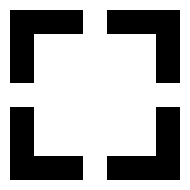

In [76]:
print_images(struct_el, fig_dim=2)

In [79]:
def build_skeleton(img, struct_el, return_steps=True):
    img = img.astype(bool)
    struct_el = struct_el.astype(bool)
    img = img.copy()
    if return_steps:
        steps = []
    else:
        skeleton = zeros_like(img, dtype=bool)
    while True:
        img_e = binary_erosion(img, structure=struct_el)
        if not(img_e.any()):
            break
        img_ed = binary_dilation(img_e, structure=struct_el)
        diff = img * invert(img_ed)
        if return_steps:
            steps.append(diff)
        else:
            skeleton += diff
        img = img_e
    if return_steps:
        steps.append(img)
        return steps
    else:
        return skeleton

def combine_steps(steps):
    return apply_along_axis(any, axis=0, array=array(steps))

def reconstruct_steps(steps, struct_el):
    result = np.zeros_like(steps[0])
    for step in reversed(steps):
        result = binary_dilation(result, struct_el) + step
    return(result)

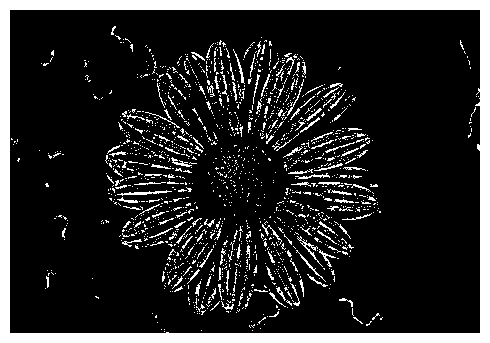

In [81]:
skeleton = build_skeleton(img_binary, struct_el, return_steps=False)
print_images(skeleton)
imsave('skeleton.png', skeleton)

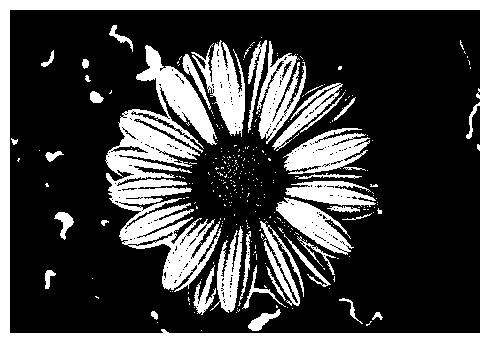

The original and reconstructed images match successfully.


In [84]:
img_sr = reconstruct_steps(build_skeleton(img_binary, struct_el), struct_el)
print_images(img_sr)
if np.any(img_binary != img_sr):
    print('There seems to be a mismatch between the original and reconstructed images.')
else:
    print('The original and reconstructed images match successfully.')